In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## 1. Load the dataset

In [59]:
# Load data into pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/experimental_dataset.csv')

In [60]:
# separate the lables
labels = df['out_and_tx_malicious']
# remove irrelavent columns
df = df.drop(['in_malicious', 'out_malicious', 'is_malicious', 'all_malicious', 'out_and_tx_malicious'], axis=1)

## 2. Explore the dataset

In [61]:
df.describe()

,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,vin_sz,vout_sz,size,fee,time,sat_per_byte
count,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,1.132500e+04,1.132500e+04,11325.000000
mean,97.184900,98.076412,195.261312,73.104483,52.389886,2.373775,6.750993,637.589934,1.026985e+05,1.356110e+09,181.375239
std,1042.614196,1034.117355,2075.477050,913.477741,547.035130,10.140495,58.288664,2592.093500,1.264157e+06,2.744573e+07,617.730654
min,0.000000,0.000000,0.000169,0.000000,0.000000,1.000000,1.000000,110.000000,0.000000e+00,1.241439e+09,0.000000
25%,0.090722,0.133266,0.278314,0.056479,0.068375,1.000000,2.000000,227.000000,1.000000e+04,1.344430e+09,20.725389
50%,1.000000,1.417279,2.941711,0.600000,0.690645,1.000000,2.000000,258.000000,5.000000e+04,1.362406e+09,114.416476
75%,10.223644,16.389500,32.171700,7.489624,7.803525,2.000000,2.000000,438.000000,5.000000e+04,1.376548e+09,220.264317
max,48194.908900,48194.908400,96389.817301,48194.908900,24097.454200,533.000000,2770.000000,96033.000000,9.700000e+07,1.388670e+09,38910.505837


# Normalising the Data
The data have a variety of ranges. To make learning easier, each feature needs to be normalised independently to have roughly the same range.

Therefore use Min-Max scaling


In [62]:
scaler = MinMaxScaler()

scaled_data = df.copy()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [63]:
scaled_data

,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,vin_sz,vout_sz,size,fee,time,sat_per_byte
0,0.001037,0.001037,0.001037,0.001037,0.002075,0.000000,0.000000,0.000511,0.000000,0.246966,0.000000
1,0.001037,0.001037,0.001037,0.001037,0.002075,0.000000,0.000000,0.001188,0.000000,0.325150,0.000000
2,0.000056,0.000056,0.000056,0.000056,0.000056,0.000000,0.000361,0.001543,0.000000,0.204946,0.000000
3,0.000000,0.001037,0.000519,0.000000,0.002075,0.000000,0.000000,0.000250,0.000000,0.157484,0.000000
4,0.000000,0.001037,0.000519,0.000000,0.002075,0.000000,0.000000,0.000250,0.000000,0.140746,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
11320,0.000482,0.000482,0.000482,0.000482,0.000482,0.000000,0.000361,0.001199,0.000103,0.980068,0.001142
11321,0.001349,0.001348,0.001349,0.000674,0.001348,0.001880,0.000361,0.003430,0.010309,0.992328,0.058542
11322,0.053782,0.050453,0.052117,0.053782,0.100906,0.000000,0.000361,0.001532,0.010309,0.992330,0.100000
11323,0.002075,0.002075,0.002075,0.002075,0.002075,0.000000,0.000361,0.001543,0.010309,0.992328,0.099612


In [64]:
def plot_dist(df):
  count = 0;
  bins = 200
  fig, ax = plt.subplots(2,3, figsize=(16,12))
  for i in range(2):
    for j in range(3):
      ax[i][j].hist(scaled_data.iloc[:,count], bins=bins, alpha=0.9, log=True, density=True)
      ax[i][j].title.set_text(df.columns[count])
      ax[i][j].grid()
      count+=1
plt.show()

In [65]:
df2 = scaled_data[['mean_in_btc', 'mean_out_btc', 'vin_sz', 'vout_sz', 'size', 'sat_per_byte']]

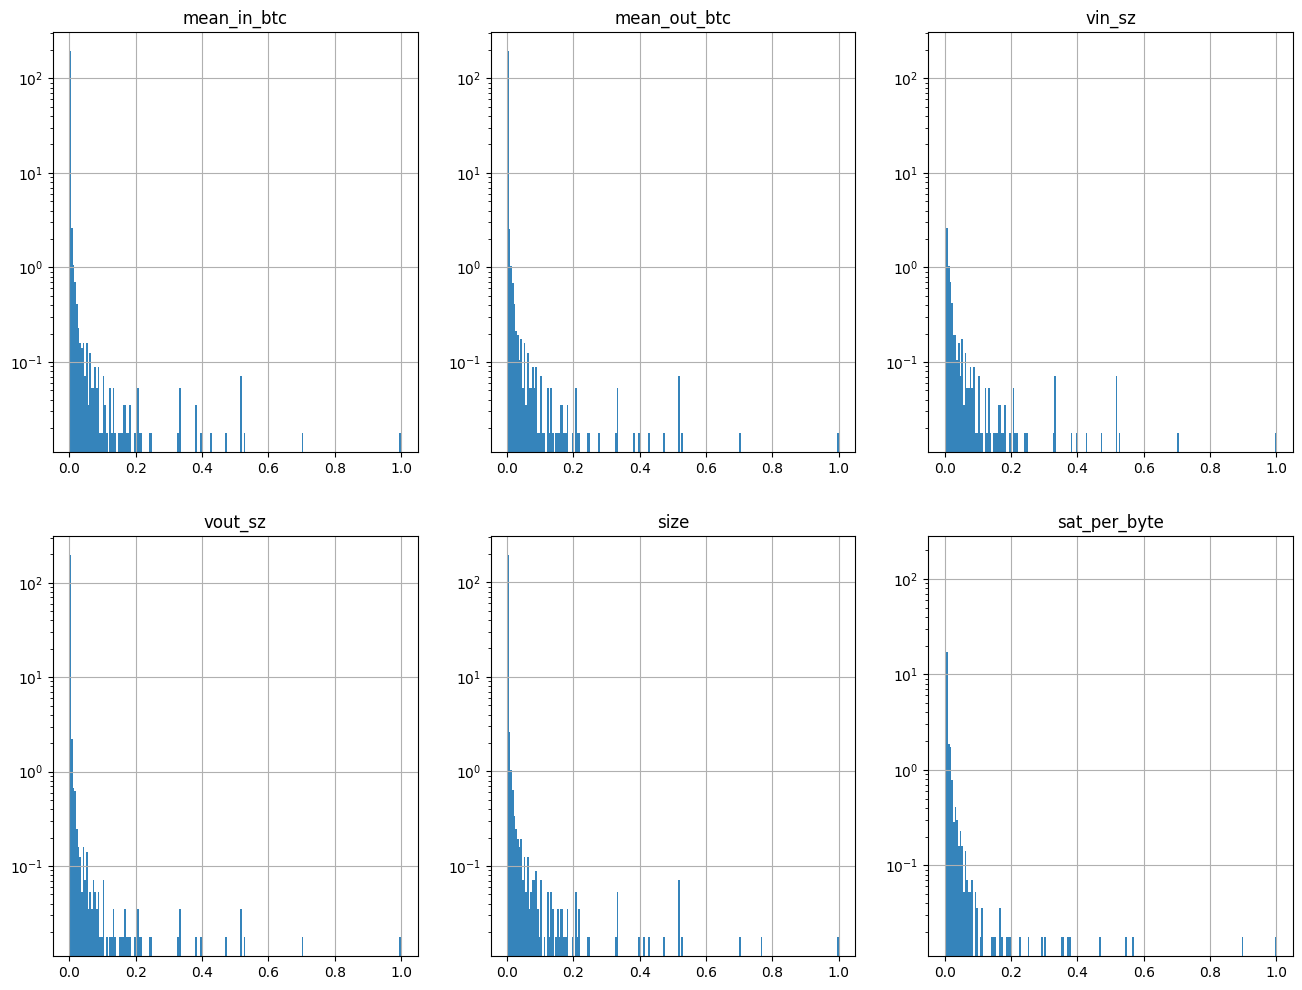

In [66]:
plot_dist(df2)

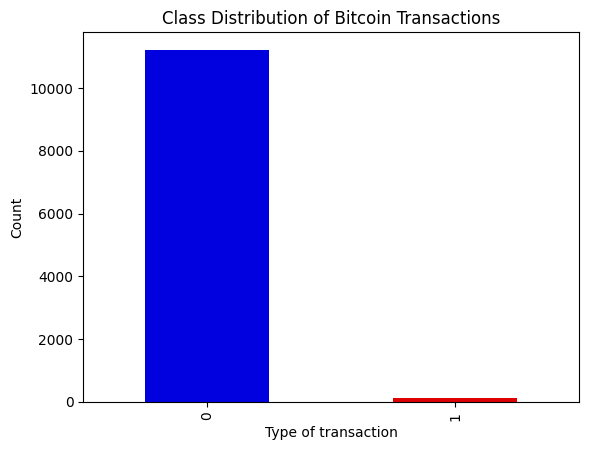

In [84]:
colors = ["#0101DF", "#DF0101"]

labels.value_counts().plot(kind='bar', color=colors)
plt.xlabel('Type of transaction')
plt.ylabel('Count')
plt.title('Class Distribution of Bitcoin Transactions')
plt.show()

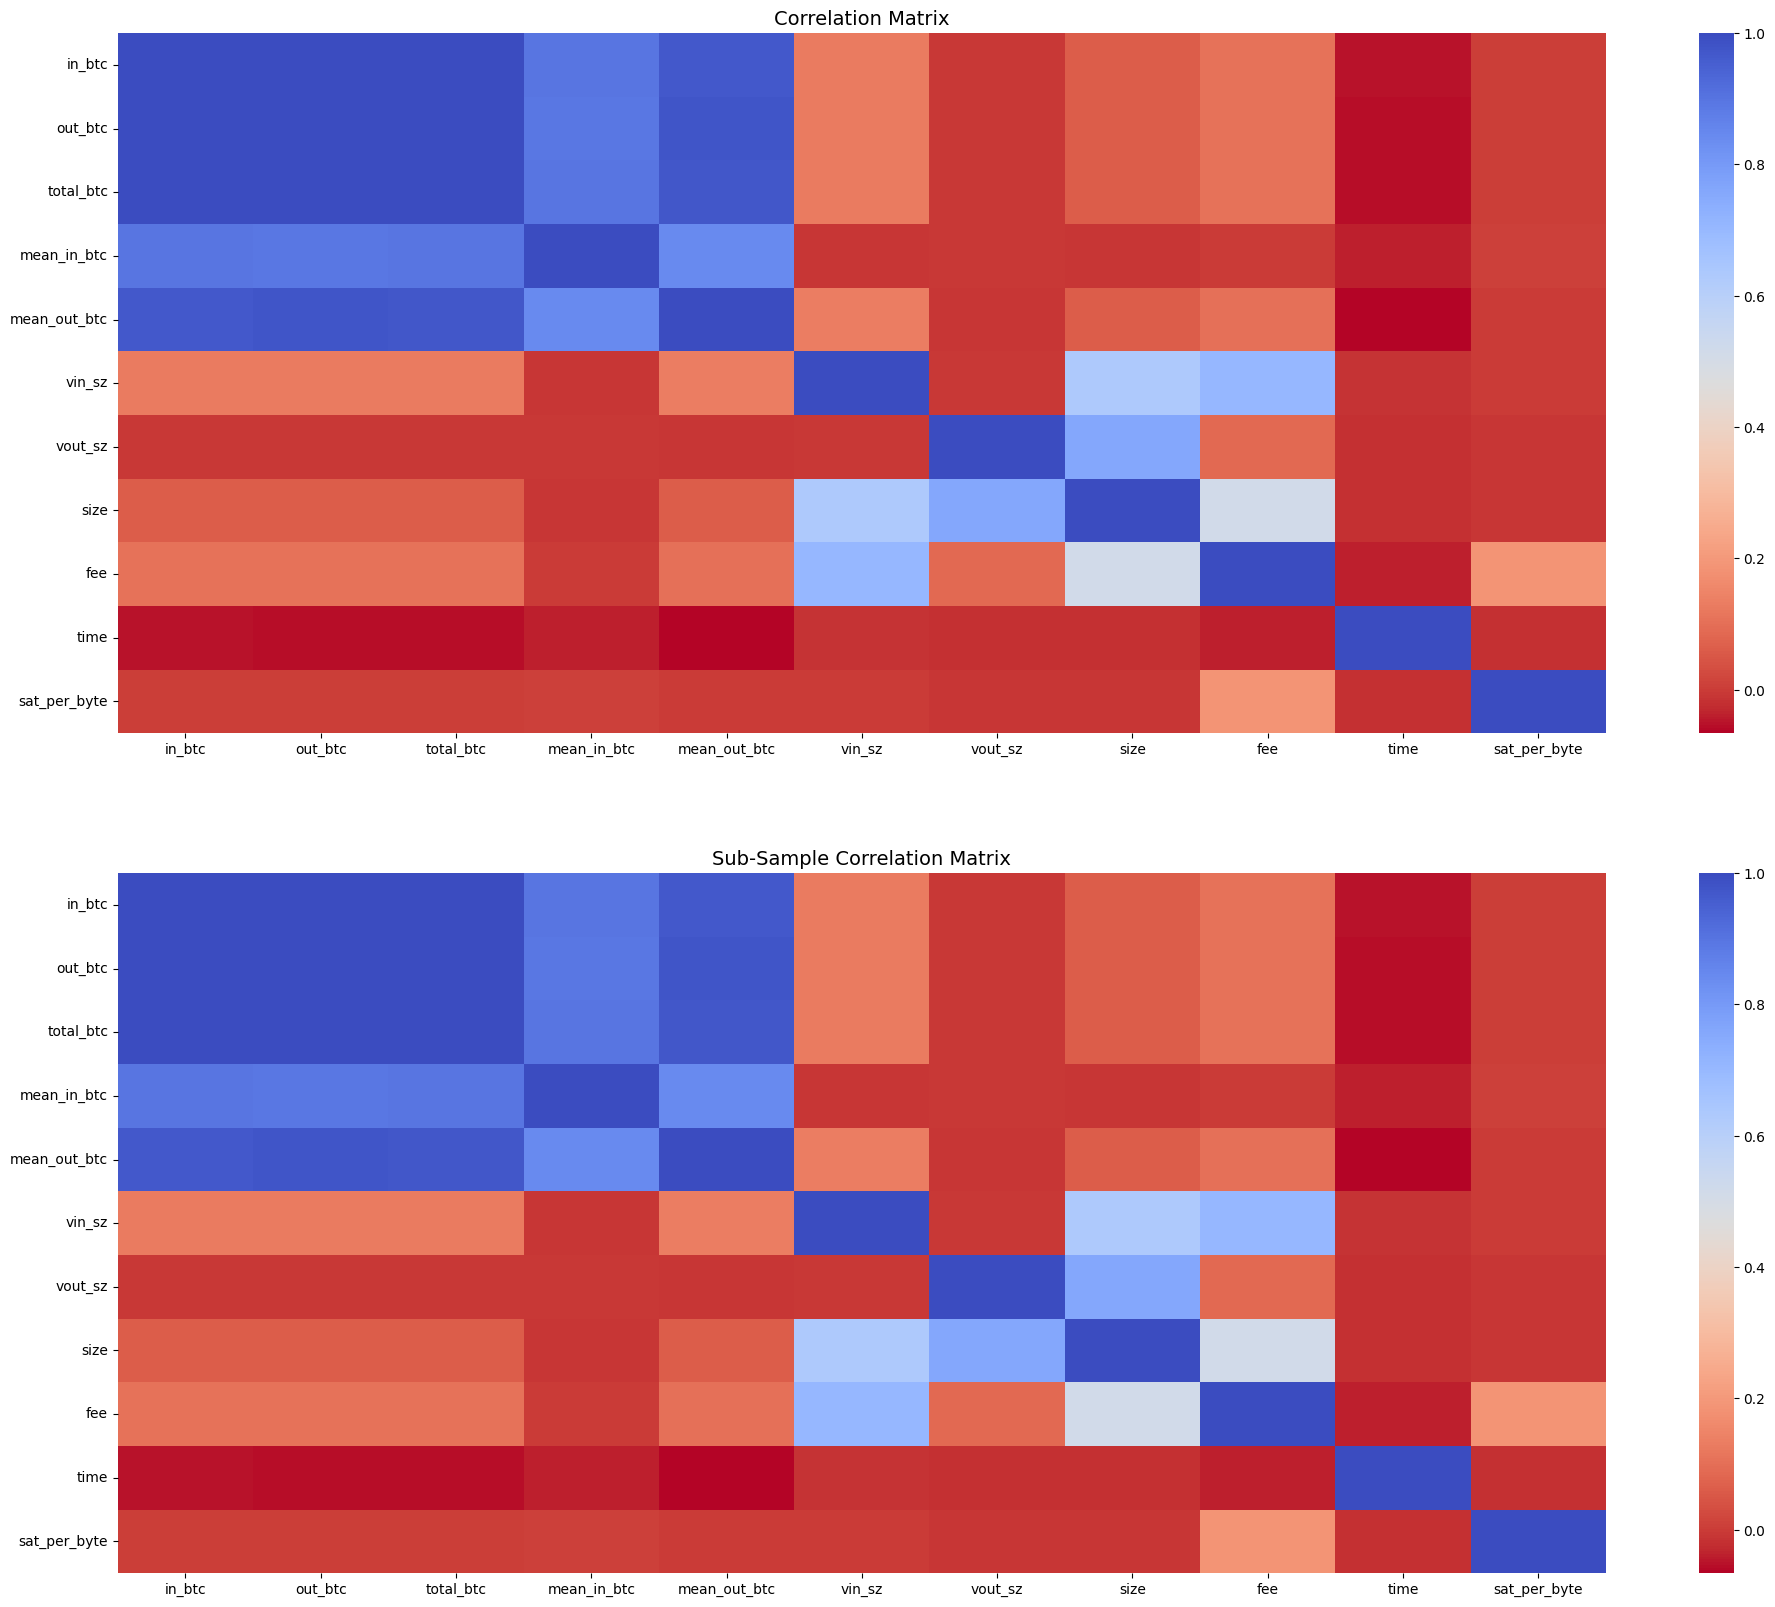

In [85]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = scaled_data.iloc[:].corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlation Matrix", fontsize=14)


sub_sample_corr = scaled_data.iloc[:].corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Sub-Sample Correlation Matrix', fontsize=14)
plt.show()

Negative Correlations: vin_sz, vout_sz negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: in_btc, mean_in_btc, out_btc, mean_out_btc and total_btc are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.


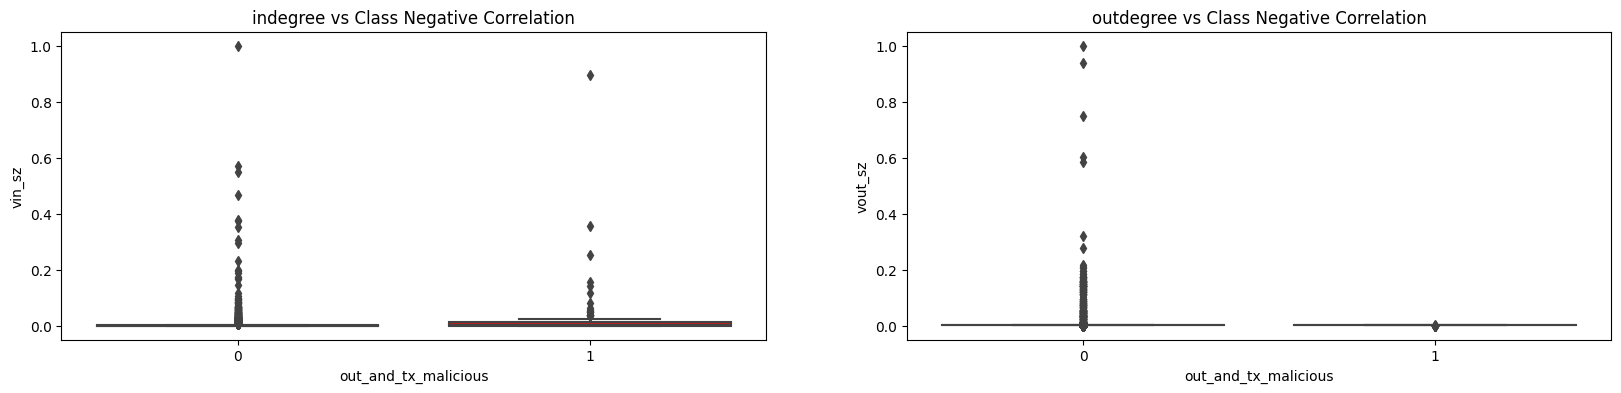

In [87]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x=labels, y="vin_sz", data=scaled_data, palette=colors, ax=axes[0])
axes[0].set_title('indegree vs Class Negative Correlation')

sns.boxplot(x=labels, y="vout_sz", data=scaled_data, palette=colors, ax=axes[1])
axes[1].set_title('outdegree vs Class Negative Correlation')

plt.show()

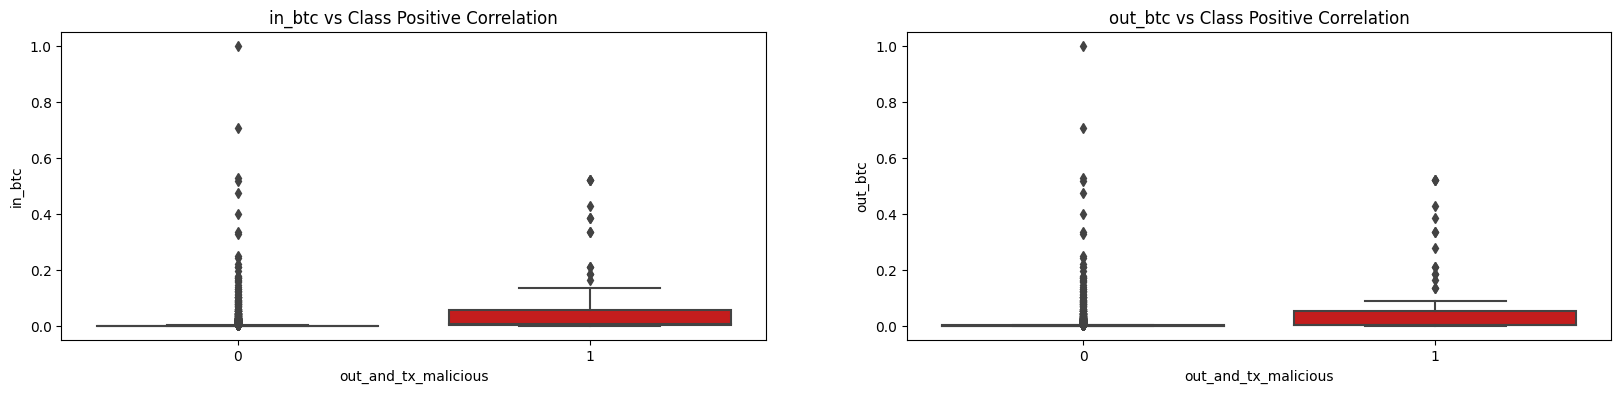

In [89]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x=labels, y="in_btc", data=scaled_data, palette=colors, ax=axes[0])
axes[0].set_title('in_btc vs Class Positive Correlation')

sns.boxplot(x=labels, y="out_btc", data=scaled_data, palette=colors, ax=axes[1])
axes[1].set_title('out_btc vs Class Positive Correlation')

plt.show()


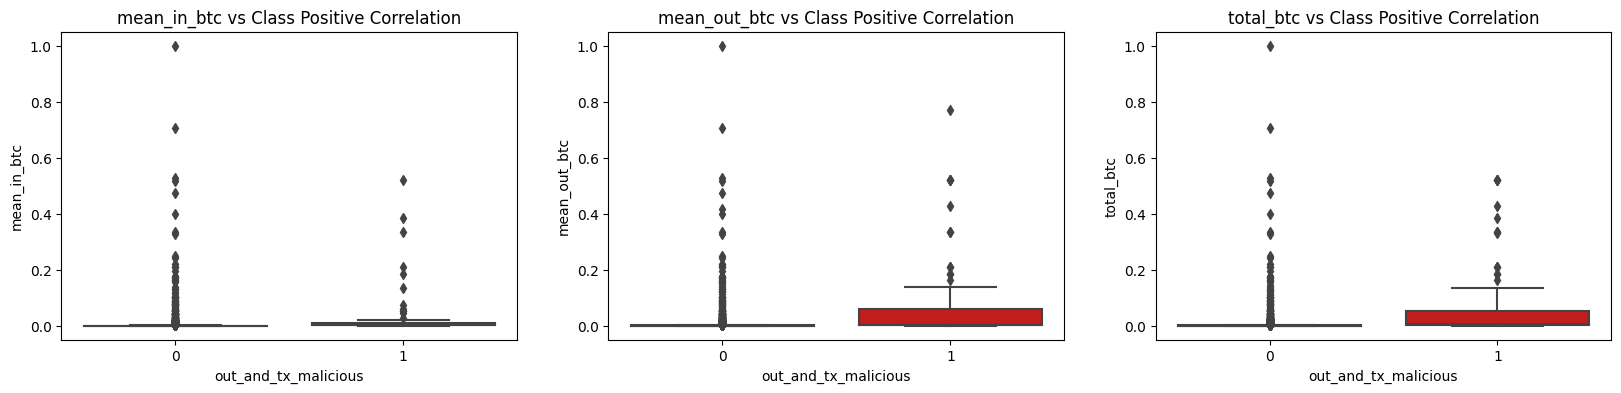

In [90]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

sns.boxplot(x=labels, y="mean_in_btc", data=scaled_data, palette=colors, ax=axes[0])
axes[0].set_title('mean_in_btc vs Class Positive Correlation')

sns.boxplot(x=labels, y="mean_out_btc", data=scaled_data, palette=colors, ax=axes[1])
axes[1].set_title('mean_out_btc vs Class Positive Correlation')

sns.boxplot(x=labels, y="total_btc", data=scaled_data, palette=colors, ax=axes[2])
axes[2].set_title('total_btc vs Class Positive Correlation')

plt.show()

Text(0.5, 1.0, 'sat per byte vs Class Positive Correlation')

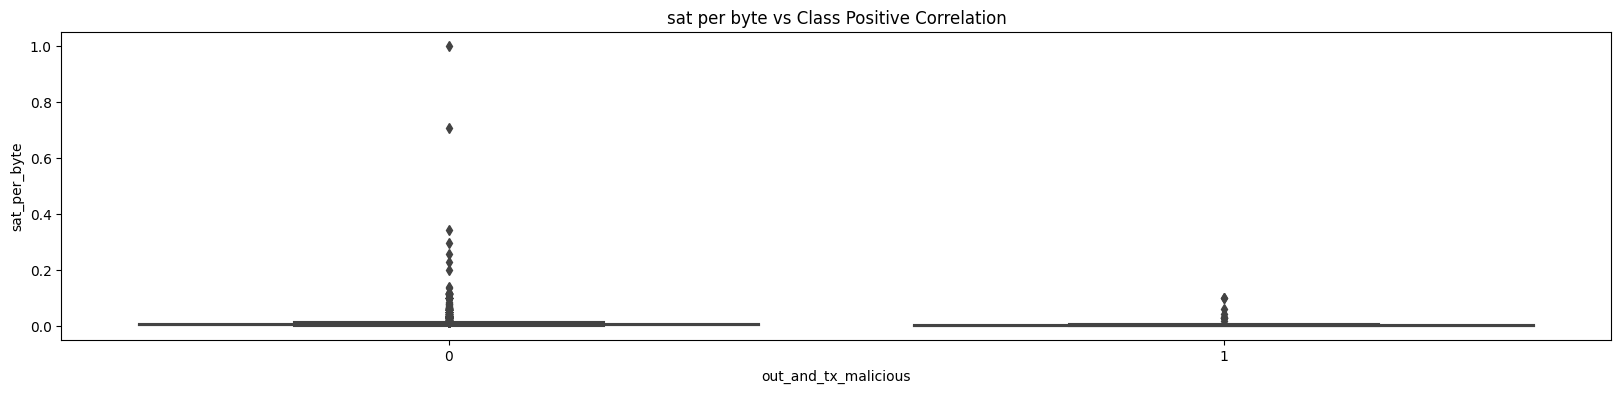

In [92]:
f, axes = plt.subplots(ncols=1, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x=labels, y="sat_per_byte", data=scaled_data, palette=colors, ax=axes)
axes.set_title('sat per byte vs Class Positive Correlation')


Text(0.5, 1.0, 'size in bytes vs Class Positive Correlation')

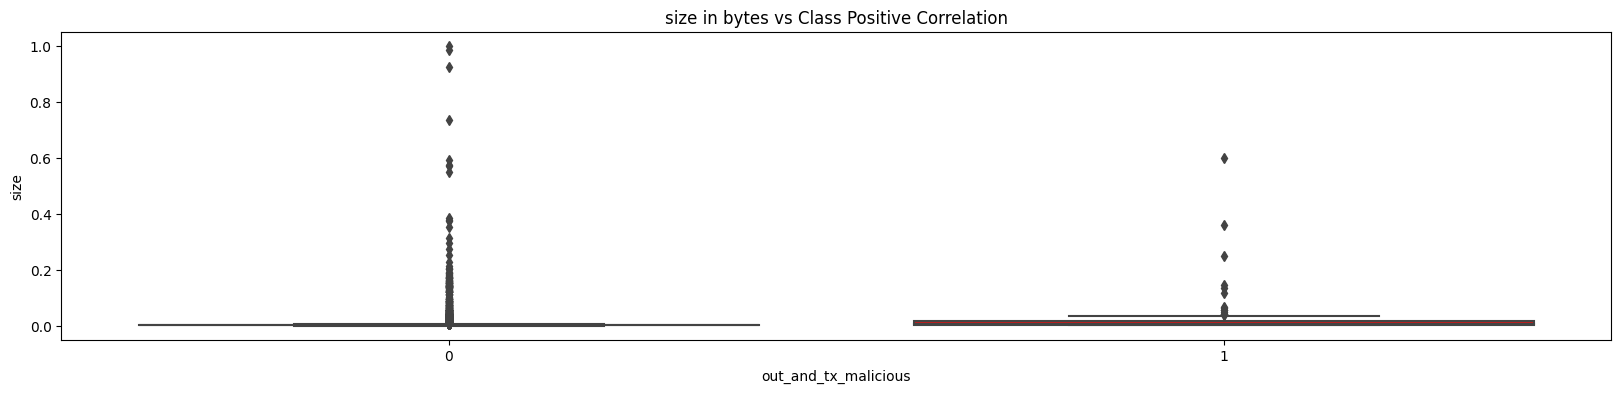

In [91]:
f, axes = plt.subplots(ncols=1, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x=labels, y="size", data=scaled_data, palette=colors, ax=axes)
axes.set_title('size in bytes vs Class Positive Correlation')


In [ ]:
# Save to file
labels.to_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/experimental_dataset_labels.csv', index=False)
scaled_data.to_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/scaled_experimental_dataset.csv', index=False)